[*********************100%***********************]  1 of 1 completed

Data processed successfully:

First few rows with flow momentum:
              datetime  inflow_mean  inflow_mean_ma7  flow_momentum
0  2024-01-01 00:00:00     0.350924         0.478033       0.734099
1  2024-01-01 01:00:00     0.183992         0.485111       0.379279
2  2024-01-01 02:00:00     0.246888         0.512214       0.482002
3  2024-01-01 03:00:00     0.640711         0.534548       1.198602
4  2024-01-01 04:00:00     0.130198         0.503181       0.258750
MultiIndex([('datetime',        ''),
            (   'Close', 'BTC-USD'),
            (    'High', 'BTC-USD'),
            (     'Low', 'BTC-USD'),
            (    'Open', 'BTC-USD'),
            (  'Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
[None]
Price                   datetime         Close          High           Low  \
Ticker                                 BTC-USD       BTC-USD       BTC-USD   
0      2024-01-01 00:00:00+00:00  42477.253906  42517.601562  42277.726562   
1      2024-01-01 01:00:0

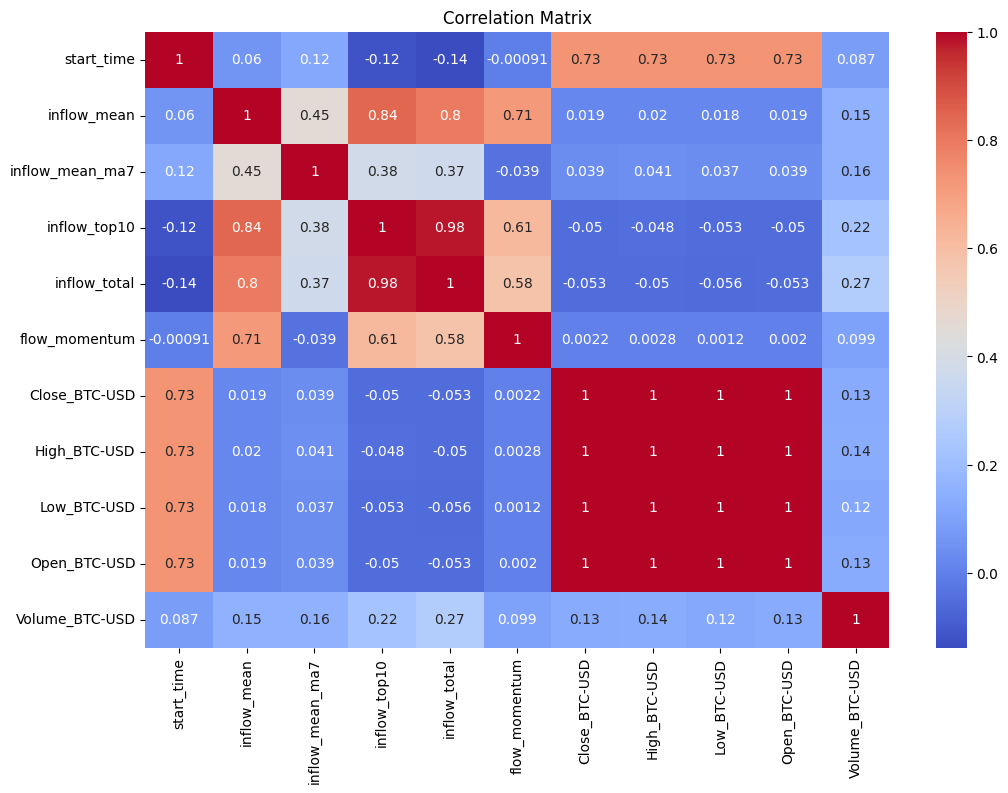

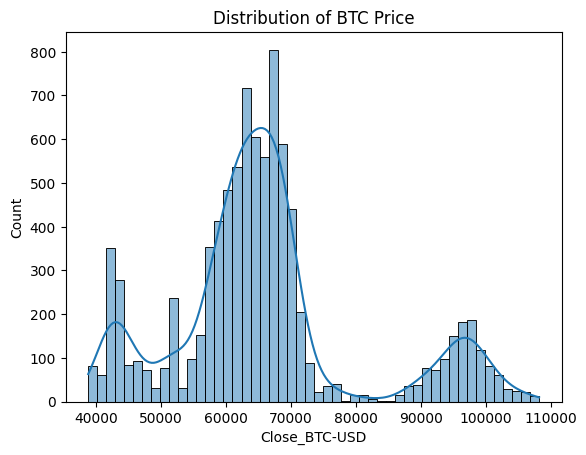

Sharpe Ratio (Annualized, Hourly Data): 1.4676


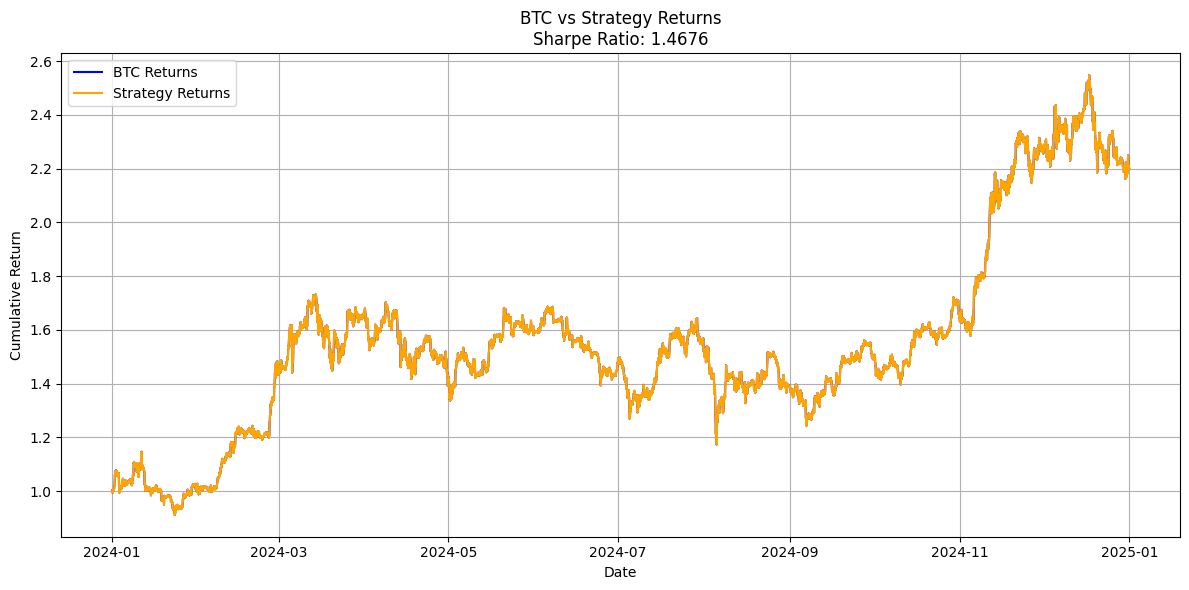

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.5138619509412437
Accuracy: 0.5180832857957787
Sharpe Ratio based on the best model's predictions: 0.9872383068998404
RandomForestClassifier Accuracy: 0.5186737804878049
Feature Importance:
 price_momentum    0.280531
inflow_mean       0.193597
flow_z            0.192013
flow_momentum     0.167196
volatility        0.166663
dtype: float64


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:27:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3093, number of negative: 3028
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 6121, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505310 -> initscore=0.021239
[LightGBM] [Info] Start training from score 0.021239
XGBoost Accuracy: 0.5076219512195121
LightGBM Accuracy: 0.5
Neural Network Accuracy: 0.5152439024390244


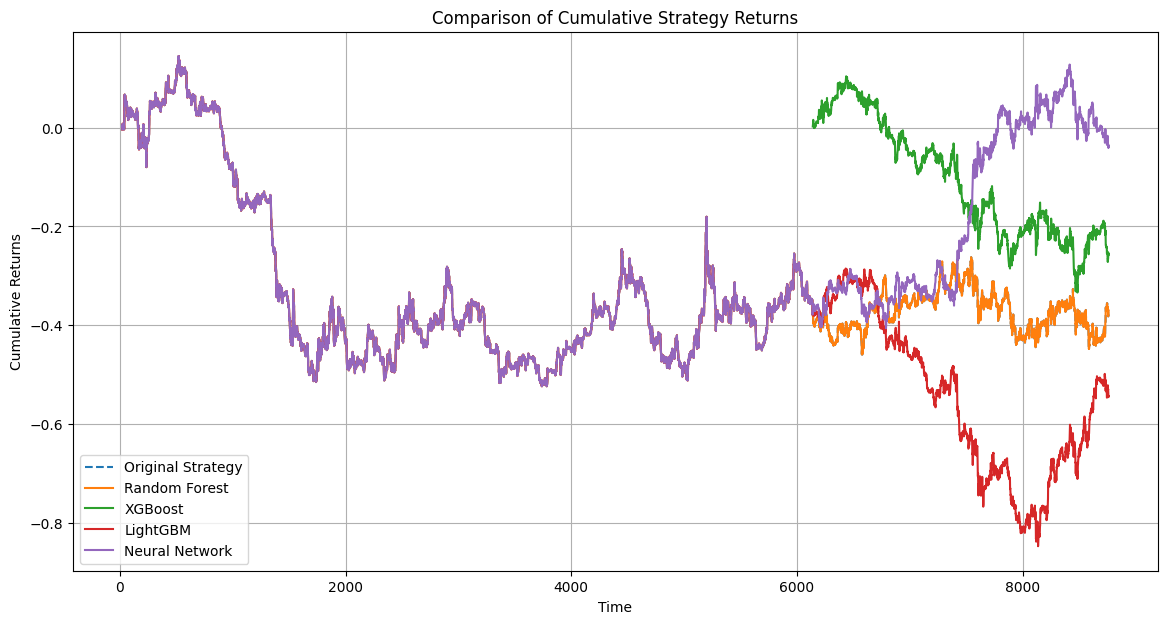

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


192/192 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.5020 - loss: 0.6940
Epoch 2/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5063 - loss: 0.6930
Epoch 3/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5053 - loss: 0.6932
Epoch 4/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5030 - loss: 0.6932
Epoch 5/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.5123 - loss: 0.6929
Epoch 6/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5056 - loss: 0.6931
Epoch 7/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5131 - loss: 0.6931
Epoch 8/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4864 - loss: 0.6935
Epoch 9/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5046 - loss: 0.6932
Epoch 10/10
192/192 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5051 - loss: 0.6930
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
LSTM Accuracy: 0.5189440030417892


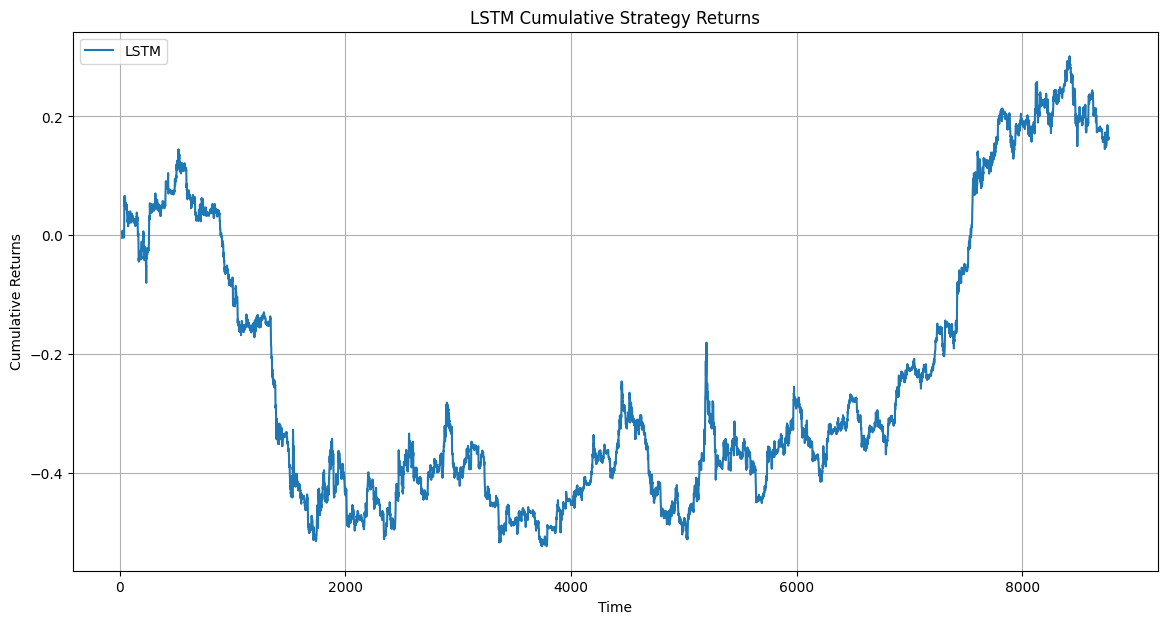

In [2]:
!pip install cybotrade-datasource

"""**Fetch the data, df**"""

import os
import pandas as pd
import asyncio
import cybotrade_datasource
from datetime import datetime, timezone
from google.colab import output
output.enable_custom_widget_manager()

# Set up your API key
API_KEY = "aeAbbBDjEjjF6tBawiWgU0QqHkxEZ2XKgCYVMTm1PbsgeK1c"

async def fetch_and_process_data():
    try:
        # Query Binance data
        data = await cybotrade_datasource.query_paginated(
            api_key=API_KEY,
            topic='cryptoquant|btc/exchange-flows/inflow?exchange=okx&window=hour',
            start_time=datetime(year=2024, month=1, day=1, tzinfo=timezone.utc),
            end_time=datetime(year=2025, month=1, day=1, tzinfo=timezone.utc)
        )

        # Convert to DataFrame
        df = pd.DataFrame(data)

        # Calculate flow momentum
        df['flow_momentum'] = df['inflow_mean'] / df['inflow_mean_ma7']

        print("Data processed successfully:")
        print("\nFirst few rows with flow momentum:")
        print(df[['datetime', 'inflow_mean', 'inflow_mean_ma7', 'flow_momentum']].head())

        return df

    except Exception as e:
        print(f"Error processing data: {str(e)}")
        raise

# Run the async function within an event loop
import nest_asyncio
nest_asyncio.apply() # Apply nest_asyncio patch for Jupyter
df = await fetch_and_process_data() # Now await the function call

df

import yfinance as yf

# Fetch hourly BTC-USD data for 2024
btc_price = yf.download("BTC-USD", start="2024-01-01", end="2025-01-01", interval="1h")
btc_price = btc_price.reset_index().rename(columns={"Datetime": "datetime"})

print(btc_price.columns)
print(btc_price.index.names)
print(btc_price.head())

# Flatten the column MultiIndex
btc_price.columns = ['_'.join(filter(None, col)).strip() for col in btc_price.columns.values]

btc_price = btc_price.reset_index(drop=True)

# Convert 'datetime' column in df to datetime objects with UTC timezone
df['datetime'] = pd.to_datetime(df['datetime'], utc=True)

# Merge the DataFrames
merged_df = pd.merge(df, btc_price, on='datetime', how='left')

"""**Merge BTC price to df**"""

# Display the merged DataFrame
merged_df

"""**Remove missing value**"""

merged_df.info()         # Data types, non-null counts
merged_df.describe()     # Summary stats for numeric columns
merged_df.head()         # First few rows
merged_df.tail()         # Last few rows
merged_df.columns       # Column names
merged_df.isnull().sum() # Check missing values

"""**Using heatmap to show the relationship between data**"""

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

sns.histplot(merged_df['Close_BTC-USD'], bins=50, kde=True)
plt.title('Distribution of BTC Price')
plt.show()

"""**Strategy and return graph**"""

# Calculate necessary columns before using them:
merged_df['price_momentum'] = merged_df['Close_BTC-USD'].pct_change(periods=3)
merged_df['volatility'] = merged_df['Close_BTC-USD'].rolling(window=10).std()

# Create 'volatility_filter' column based on your logic
# Define threshold here (you might need to choose a specific value)
threshold_volatility = merged_df['Close_BTC-USD'].mean()  # Example: using the mean
merged_df['volatility_filter'] = (merged_df['volatility'] < threshold_volatility).astype(int)

merged_df['flow_z'] = (merged_df['flow_momentum'] - merged_df['flow_momentum'].rolling(20).mean()) / merged_df['flow_momentum'].rolling(20).std()

# Calculate 'combo_signal'
merged_df['combo_signal'] = (
    0.3 * merged_df['flow_momentum'] +
    0.3 * merged_df['inflow_mean'] +
    0.2 * merged_df['price_momentum'] +
    0.2 * merged_df['volatility_filter']
)

# Now you can calculate the threshold using the 'combo_signal' column
threshold = merged_df['combo_signal'].quantile(0.80)

# Calculate returns
merged_df['returns'] = merged_df['Close_BTC-USD'].pct_change()

# Default Strategy:
merged_df['strategy_returns'] = merged_df['returns']  # Assume buy and hold if no other strategy is defined.

merged_df

# prompt: calculate the sharp ratio

import numpy as np
# Assuming 'merged_df' and 'strategy_returns' are already defined as in the previous code.

# Calculate Sharpe Ratio (annualized, assuming hourly data)
hourly_returns = merged_df['strategy_returns'].dropna() # Remove NaNs introduced by pct_change
annualized_factor = np.sqrt(252 * 24) # Hourly data, annualize it
sharpe_ratio = hourly_returns.mean() / hourly_returns.std() * annualized_factor

print(f"Sharpe Ratio (Annualized, Hourly Data): {sharpe_ratio:.4f}")

import matplotlib.pyplot as plt

# Calculate cumulative returns
btc_cum_returns = (1 + merged_df['returns'].dropna()).cumprod()
strategy_cum_returns = (1 + merged_df['strategy_returns'].dropna()).cumprod()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(merged_df['datetime'].iloc[1:], btc_cum_returns, label='BTC Returns', color='blue')
plt.plot(merged_df['datetime'].iloc[1:], strategy_cum_returns, label='Strategy Returns', color='orange')
plt.title(f'BTC vs Strategy Returns\nSharpe Ratio: {sharpe_ratio:.4f}')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# prompt: drop nan

merged_df = merged_df.dropna()

merged_df

"""**Backtesting Machine Learning Model**"""

# prompt: Backtest different combinations using grid search or optimization techniques (e.g., Bayesian optimization or sklearn GridSearchCV) to maximize the Sharpe ratio.

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Prepare your features (X) and target variable (y)
# Example: Using flow_momentum and inflow_mean as features
X = merged_df[['flow_momentum', 'inflow_mean']]  # Replace with your chosen features
y = (merged_df['strategy_returns'] > 0).astype(int)  # Example target: 1 if positive return, 0 otherwise

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Choose solvers that support both penalties
}

# Create a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Create a GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy') # Use a suitable scoring metric

# Fit the GridSearchCV to the data
grid_search.fit(X, y)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_logreg = grid_search.best_estimator_

# Use the best model to make predictions
predictions = best_logreg.predict(X)

# Evaluate the model (example using accuracy)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)

# Integrate predictions into your backtesting strategy
merged_df['predicted_position'] = predictions  # 1 for long, 0 for short (or -1, etc.)

# Calculate strategy returns based on the predictions
merged_df['predicted_strategy_returns'] = merged_df['predicted_position'].shift(1) * merged_df['returns']

# Calculate the Sharpe ratio for the strategy using the predicted returns
predicted_sharpe_ratio = (merged_df['predicted_strategy_returns'].mean() / merged_df['predicted_strategy_returns'].std()) * np.sqrt(252 * 24)
print(f"Sharpe Ratio based on the best model's predictions: {predicted_sharpe_ratio}")

merged_df = merged_df.dropna().reset_index(drop=True)

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# ----- 1. Feature Engineering -----
merged_df['returns'] = merged_df['Close_BTC-USD'].pct_change()
merged_df['price_momentum'] = merged_df['Close_BTC-USD'].pct_change(periods=3)
merged_df['volatility'] = merged_df['Close_BTC-USD'].rolling(window=10).std()
merged_df['flow_z'] = (merged_df['flow_momentum'] - merged_df['flow_momentum'].rolling(20).mean()) / merged_df['flow_momentum'].rolling(20).std()

# Drop NaNs from feature creation
merged_df.dropna(inplace=True)

# ----- 2. Create Labels -----
# Binary classification: 1 if return > 0, else 0
merged_df['target'] = (merged_df['returns'].shift(-1) > 0).astype(int)  # Predict next period

# ----- 3. Prepare ML Inputs -----
features = ['flow_momentum', 'inflow_mean', 'price_momentum', 'volatility', 'flow_z']
X = merged_df[features]
y = merged_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

# ----- 4. Train Model -----
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train, y_train)
print("RandomForestClassifier Accuracy:", model.score(X_test, y_test))

# Optional: check feature importance
feat_importance = pd.Series(model.feature_importances_, index=features)
print("Feature Importance:\n", feat_importance.sort_values(ascending=False))

# ----- 5. Predict & Backtest -----
merged_df['prediction'] = 0
# Reset index of X_test to match merged_df
X_test_reset = X_test.reset_index(drop=True)
merged_df.loc[X_test.index, 'prediction'] = model.predict(X_test_reset)

# Position: long if prediction = 1, else short
merged_df['position'] = merged_df['prediction'].shift(1).replace({0: -1, 1: 1})

# Backtest
merged_df['strategy_returns'] = merged_df['position'] * merged_df['returns']

# prompt: train with XGBoost Regressor
# LightGBM Regressor
# Neural Net

import matplotlib.pyplot as plt
!pip install xgboost lightgbm

import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# ----- 1. Create Binary Target -----
# Predict whether next return will be positive
merged_df['target'] = (merged_df['returns'].shift(-1) > 0).astype(int)

# ----- 2. Prepare Features -----
features = ['flow_momentum', 'inflow_mean', 'price_momentum', 'volatility', 'flow_z']
merged_df = merged_df.dropna(subset=features + ['target'])  # Ensure no NaNs

X = merged_df[features]
y = merged_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)

# ----- 3a. XGBoost Classifier -----
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

# ----- 3b. LightGBM Classifier -----
lgb_model = lgb.LGBMClassifier(objective='binary', random_state=42)
lgb_model.fit(X_train, y_train)
lgb_predictions = lgb_model.predict(X_test)
lgb_accuracy = accuracy_score(y_test, lgb_predictions)

# ----- 3c. Neural Network (MLP) -----
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_accuracy = accuracy_score(y_test, nn_predictions)

# ----- 4. Backtest Example with XGBoost -----
merged_df['xgb_prediction'] = np.nan
merged_df.loc[X_test.index, 'xgb_prediction'] = xgb_predictions
merged_df['xgb_strategy_returns'] = merged_df['xgb_prediction'].shift(1).replace({0: -1, 1: 1}) * merged_df['returns']

print(f"XGBoost Accuracy: {xgb_accuracy}")
print(f"LightGBM Accuracy: {lgb_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")

# prompt: compare 3 the different model and generate a graph to visualise the different show different

import matplotlib.pyplot as plt
# Plotting cumulative returns for all three models

plt.figure(figsize=(14, 7))

# Original Strategy
plt.plot(merged_df['strategy_returns'].cumsum(), label='Original Strategy', linestyle='--')

# RandomForest
merged_df['rf_strategy_returns'] = merged_df['position'] * merged_df['returns']
plt.plot(merged_df['rf_strategy_returns'].cumsum(), label='Random Forest')

# XGBoost
plt.plot(merged_df['xgb_strategy_returns'].cumsum(), label='XGBoost')

# LightGBM
merged_df['lgb_prediction'] = 0
merged_df.loc[X_test.index, 'lgb_prediction'] = lgb_predictions
merged_df['lgb_position'] = merged_df['lgb_prediction'].shift(1).replace({0: -1, 1: 1})
merged_df['lgb_strategy_returns'] = merged_df['lgb_position'] * merged_df['returns']
plt.plot(merged_df['lgb_strategy_returns'].cumsum(), label='LightGBM')

# Neural Network
merged_df['nn_prediction'] = 0
merged_df.loc[X_test.index, 'nn_prediction'] = nn_predictions
merged_df['nn_position'] = merged_df['nn_prediction'].shift(1).replace({0: -1, 1: 1})
merged_df['nn_strategy_returns'] = merged_df['nn_position'] * merged_df['returns']
plt.plot(merged_df['nn_strategy_returns'].cumsum(), label='Neural Network')


plt.title('Comparison of Cumulative Strategy Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

# prompt: use lstm to train the data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'merged_df' and 'X_train', 'X_test', 'y_train', 'y_test' are already defined

# 1. Data Preparation for LSTM

# Select features for LSTM (example)
lstm_features = ['flow_momentum', 'inflow_mean', 'price_momentum']
X_lstm = merged_df[lstm_features]

# Scale the features to the range [0, 1]
scaler = MinMaxScaler()
X_lstm_scaled = scaler.fit_transform(X_lstm)

# Reshape the data for LSTM input (samples, timesteps, features)
timesteps = 10  # Adjust the number of timesteps as needed
X_lstm_reshaped = []
y_lstm = []
for i in range(timesteps, len(X_lstm_scaled)):
    X_lstm_reshaped.append(X_lstm_scaled[i - timesteps:i])
    # Use .iloc to access by position instead of index label
    y_lstm.append(merged_df['target'].iloc[i])  # Use the 'target' variable

X_lstm_reshaped, y_lstm = np.array(X_lstm_reshaped), np.array(y_lstm)


# Split into train and test sets (consider using TimeSeriesSplit for better evaluation)
split_index = int(len(X_lstm_reshaped) * 0.7)
X_train_lstm, X_test_lstm = X_lstm_reshaped[:split_index], X_lstm_reshaped[split_index:]
y_train_lstm, y_test_lstm = y_lstm[:split_index], y_lstm[split_index:]


# 2. Build and Train the LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(1, activation='sigmoid')) # Output layer for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_lstm, y_train_lstm, epochs=10, batch_size=32) # Adjust epochs and batch_size


# 3. Make Predictions and Evaluate

lstm_predictions = model.predict(X_test_lstm)
lstm_predictions = (lstm_predictions > 0.5).astype(int) # Convert probabilities to binary predictions
lstm_accuracy = np.mean(lstm_predictions == y_test_lstm)
print(f"LSTM Accuracy: {lstm_accuracy}")

# ----- 5. Backtest (example with LSTM) -----
merged_df['lstm_prediction'] = 0
# Need to align LSTM prediction indices with the original dataframe
merged_df.loc[merged_df.index[timesteps+split_index:], 'lstm_prediction'] = lstm_predictions.flatten()
merged_df['lstm_position'] = merged_df['lstm_prediction'].shift(1).replace({0: -1, 1: 1})
merged_df['lstm_strategy_returns'] = merged_df['lstm_position'] * merged_df['returns']

#Plot LSTM results
plt.figure(figsize=(14,7))
plt.plot(merged_df['lstm_strategy_returns'].cumsum(), label='LSTM')
plt.title('LSTM Cumulative Strategy Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()